# Data Preparation

In [5]:
# Data Preprocessing
import pandas as pd
import numpy as np

# Visualizatin
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

In [7]:
diet_dataset = pd.read_csv("./data/recipes_fatsecret.csv")
diet_dataset.head()

,Name,Meal Type,Serving,Prep Time,Cook Time,Ingredients,Intructions,Energi_kj,Lemak_g,Protein_g,...,Kalori_kkal,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg
0,Donat,"['Roti & Produk Panggang', 'Makanan Ringan', '...",12 porsi,20 menit,15 menit,"['3 gram ragi', '40 gram kuning telur', '30 gr...","['Campur semua bahan kering.', 'Tambahkan semu...",444 kj,"1,73g","3,7g",...,106 kkal,"0,634g",0,"0,205g","0,528g",43mg,"0,1g","3,46g",10mg,26mg
1,Muffin Oat Pisang,"['Roti & Produk Panggang', 'Makanan Penutup', ...",5 porsi,10 menit,25 menit,"['1 sedang telur', '1 sdt ekstrak vanila', '15...","['Masukan semua bahan pada blender.', 'Setelah...",571 kj,"2,98g","4,02g",...,136 kkal,"0,593g",0g,"0,714g","1,203g",37mg,"2,5g","5,93g",295mg,138mg
2,Banana Bread Oats,"['Makanan Ringan', 'Makanan Penutup', 'Roti & ...",4 porsi,15 menit,15 menit,"['2 besar telur', '1 sdt kayu manis', '115 g b...",['Panaskan oven/airfryer dengan suhu 160°C sel...,1032 kj,"8,53g","8,84g",...,247 kkal,"1,231g",0g,"1,202g","2,24g",106mg,"4,4g","7,64g",76mg,142mg
3,Bilah Energi Oatmeal Cokelat,"['Makanan Ringan', 'Makanan Penutup']",16 porsi,30 menit,0 menit,['25 gram biji bunga matahari (yang) dikuliti ...,['Sangrai oatmeal sampai kecoklatan. Dinginkan...,386 kj,"3,61g","2,06g",...,92 kkal,"0,552g",0g,"0,674g","0,572g",0mg,1g,"7,44g",26mg,71mg
4,Kue Pisang,"['Makanan Penutup', 'Makanan Ringan', 'Lainnya...",4 porsi,15 menit,20 menit,"['1 besar telur', '1 sdt kayu manis', '1/4 sdt...","['Hancurkan pisang.', 'Aduk telur sampai berbu...",492 kj,"2,76g","6,3g",...,118 kkal,"0,674g",0g,"0,559g","1,026g",57mg,"2,4g","4,88g",492mg,156mg


In [8]:
diet_dataset.iloc[0]

Name                                                                     Donat
Meal Type                    ['Roti & Produk Panggang', 'Makanan Ringan', '...
Serving                                                               12 porsi
Prep Time                                                             20 menit
Cook Time                                                             15 menit
Ingredients                  ['3 gram ragi', '40 gram kuning telur', '30 gr...
Intructions                  ['Campur semua bahan kering.', 'Tambahkan semu...
Energi_kj                                                               444 kj
Lemak_g                                                                  1,73g
Protein_g                                                                 3,7g
Karbohidrat_g                                                            19,3g
Kalori_kkal                                                           106 kkal
Lemak Jenuh_g                                       

In [9]:
diet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       327 non-null    object
 1   Meal Type                  327 non-null    object
 2   Serving                    327 non-null    object
 3   Prep Time                  327 non-null    object
 4   Cook Time                  327 non-null    object
 5   Ingredients                327 non-null    object
 6   Intructions                327 non-null    object
 7   Energi_kj                  327 non-null    object
 8   Lemak_g                    327 non-null    object
 9   Protein_g                  327 non-null    object
 10  Karbohidrat_g              327 non-null    object
 11  Kalori_kkal                327 non-null    object
 12  Lemak Jenuh_g              327 non-null    object
 13  Lemak Trans_g              327 non-null    object
 14  Lemak tak 

**Insigth**
Beberapa tipe data yang perlu diperbaiki
1. Macro (kalori,protin, dll) dan sub Macro (gula, serat, dll) perlu menjadi numeric (int atau float)
2. prep time dan cook time perlu menjadi numeric dan menitnya diberikan keterangan pada kolom ex: prep time (menit)

# Data Wrangling

### Cleaning Macro Data

In [10]:
numeric_columns = diet_dataset.columns[7:]
for col in numeric_columns:
    diet_dataset[col] = diet_dataset[col].str.replace(r'[^\d,.]+', '', regex=True).str.replace(',', '.', regex=False).astype(float)

In [74]:
pd.DataFrame(diet_dataset.loc[diet_dataset['Name']=="Donat"].iloc[0, 7:21])

,0
Energi_kj,444.0
Lemak_g,1.73
Protein_g,3.7
Karbohidrat_g,19.3
Kalori_kkal,106.0
Lemak Jenuh_g,0.634
Lemak Trans_g,0.0
Lemak tak Jenuh Ganda_g,0.205
Lemak tak Jenuh Tunggal_g,0.528
Kolesterol_mg,43.0


In [71]:
for i in diet_dataset.loc[diet_dataset['Name']=="Donat"].iloc[0, 7:21]:
    print(round(i,1))

444.0
1.7
3.7
19.3
106.0
0.6
0.0
0.2
0.5
43.0
0.1
3.5
10.0
26.0


### Cleaning Preparation Cook

In [12]:
def convert_to_minutes(time_str):
    try:
        # Pisahkan angka dan satuan
        value, unit = time_str.split()
        value = int(value)
        if unit == 'menit':
            return value
        elif unit == 'jam':
            return value * 60
    except ValueError:
        return 0

In [13]:
prep_time = diet_dataset['Prep Time'].apply(convert_to_minutes)
cook_time = diet_dataset['Cook Time'].apply(convert_to_minutes)

diet_dataset['total_prep_food'] = prep_time + cook_time

In [14]:
diet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       327 non-null    object 
 1   Meal Type                  327 non-null    object 
 2   Serving                    327 non-null    object 
 3   Prep Time                  327 non-null    object 
 4   Cook Time                  327 non-null    object 
 5   Ingredients                327 non-null    object 
 6   Intructions                327 non-null    object 
 7   Energi_kj                  327 non-null    float64
 8   Lemak_g                    327 non-null    float64
 9   Protein_g                  327 non-null    float64
 10  Karbohidrat_g              327 non-null    float64
 11  Kalori_kkal                327 non-null    float64
 12  Lemak Jenuh_g              327 non-null    float64
 13  Lemak Trans_g              327 non-null    float64

In [15]:
diet_dataset.describe()

,Energi_kj,Lemak_g,Protein_g,Karbohidrat_g,Kalori_kkal,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg,total_prep_food
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,970.269113,9.372905,13.020428,25.871009,231.889908,2.663905,0.009755,2.023657,2.558792,71.581040,3.789908,8.457798,816.336391,511.733945,28.856269
std,685.874164,8.810031,12.657719,22.068061,163.905947,2.840695,0.046416,2.672201,2.749078,96.127752,4.352073,9.489201,1204.873757,1826.709644,17.595684
min,20.000000,0.000000,0.000000,0.390000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,475.500000,2.920000,3.740000,9.630000,113.500000,0.647000,0.000000,0.409500,0.482000,0.000000,1.250000,2.185000,72.500000,134.500000,15.000000
50%,854.000000,7.410000,8.670000,21.000000,204.000000,1.797000,0.000000,1.135000,1.871000,31.000000,2.700000,5.200000,402.000000,322.000000,25.000000
75%,1303.500000,12.760000,17.910000,34.935000,311.500000,3.809500,0.000000,2.552000,3.957000,106.000000,5.000000,11.680000,1024.000000,582.500000,35.000000
max,5205.000000,67.380000,76.660000,159.810000,1244.000000,19.682000,0.415000,23.499000,22.645000,499.000000,40.700000,74.480000,11626.000000,32572.000000,150.000000


# Get All Ingredients

In [16]:
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
ingredients_data = diet_dataset['Ingredients'].apply(eval)

In [ ]:
ingredients_data = diet_dataset['Intructions'].apply(eval)

In [46]:
ingredients_data[0][0]

'3 gram ragi'

In [18]:
all_ingredients = [ingredient for ingredients in ingredients_data for ingredient in ingredients]

### Remove numbers and units from all ingredients

In [35]:
food_items = [re.sub(r'\d+\s*(gram|ml|sdt|sdm|siung|sedang|buah|kecil|besar|mangkok|gelas|elas|sejumput|utuh|elas|ons|porsi|g|tsp|tbsp|sachet|cup|iris|diameter|cm|l|liter)?', '', item).strip() for item in all_ingredients]
food_items = [''.join(char for char in item if char not in string.punctuation) for item in food_items]

# Hapus bahan makanan yang kosong atau hanya berisi spasi
food_items = [item for item in food_items if item]

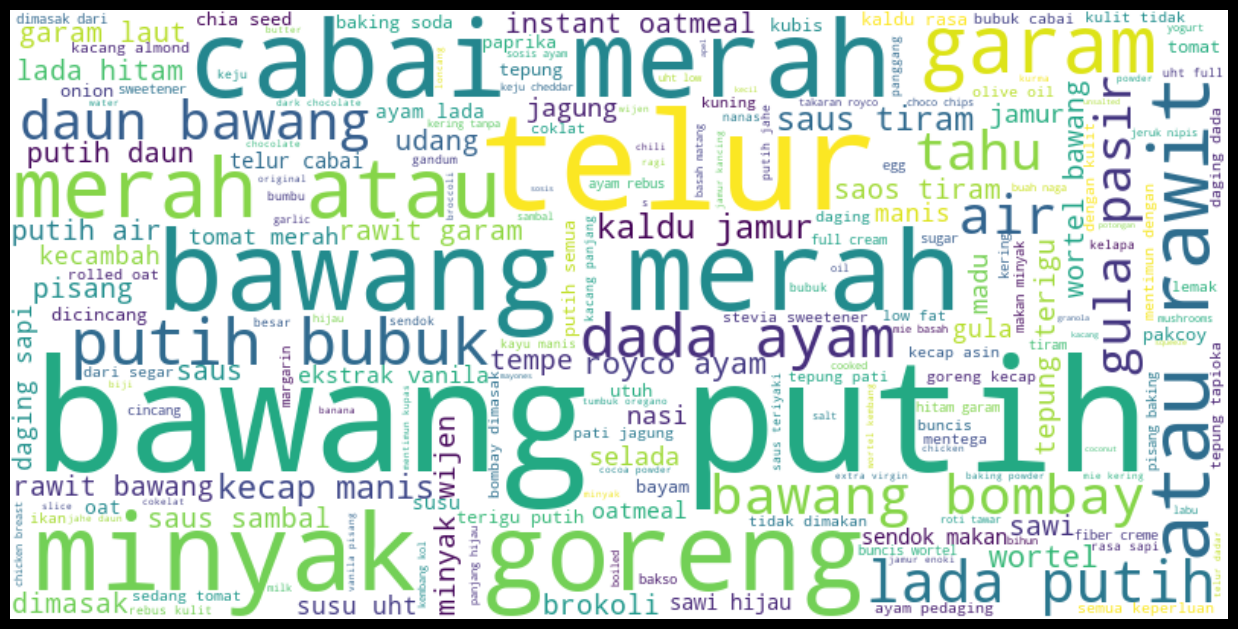

In [36]:
# Menggabungkan semua kata menjadi satu string
all_ingredients_text = ' '.join(food_items)

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients_text)

# Menampilkan word cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

In [22]:
max_calories=2000
max_daily_fat=100
max_daily_saturatedfat=13
max_daily_cholesterol=300
max_daily_sodium=2300
max_daily_carbohydrate=325
max_daily_sugar=40
max_daily_protein=200
max_daily_potassium = 2000
max_list=[max_calories,max_daily_fat,max_daily_saturatedfat,max_daily_cholesterol,max_daily_sodium,max_daily_carbohydrate,max_daily_sugar,max_daily_protein, max_daily_potassium]
feature_selected = ["Kalori_kkal", "Lemak_g", "Lemak Jenuh_g", "Kolesterol_mg", "Sodium_mg", "Karbohidrat_g", "Gula_g", "Protein_g", "Kalium_mg"]

In [23]:
diet_dataset_max=diet_dataset.copy()
for column,maximum in zip(feature_selected,max_list):
    extracted_data=diet_dataset_max[diet_dataset_max[column]<maximum]

In [24]:
extracted_data.describe()

,Energi_kj,Lemak_g,Protein_g,Karbohidrat_g,Kalori_kkal,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg,total_prep_food
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,951.149068,9.306180,12.720466,25.028820,227.319876,2.655854,0.009006,1.990736,2.534854,71.381988,3.610870,8.102298,798.574534,386.232919,28.869565
std,660.695260,8.803376,12.307253,20.448515,157.885207,2.847884,0.044261,2.665775,2.736575,96.300704,3.727289,8.706846,1186.987439,324.228005,17.694053
min,20.000000,0.000000,0.000000,0.390000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,473.250000,2.920000,3.707500,9.585000,113.000000,0.642500,0.000000,0.408250,0.482000,0.000000,1.200000,2.075000,71.250000,132.250000,15.000000
50%,849.000000,7.375000,8.640000,20.240000,203.000000,1.791000,0.000000,1.093000,1.866500,31.000000,2.700000,5.085000,396.000000,308.500000,25.000000
75%,1293.750000,12.745000,17.792500,34.105000,309.250000,3.824750,0.000000,2.491500,3.922750,106.000000,4.975000,11.245000,1011.500000,562.500000,35.000000
max,5205.000000,67.380000,76.660000,159.810000,1244.000000,19.682000,0.415000,23.499000,22.645000,499.000000,39.400000,51.620000,11626.000000,1878.000000,150.000000


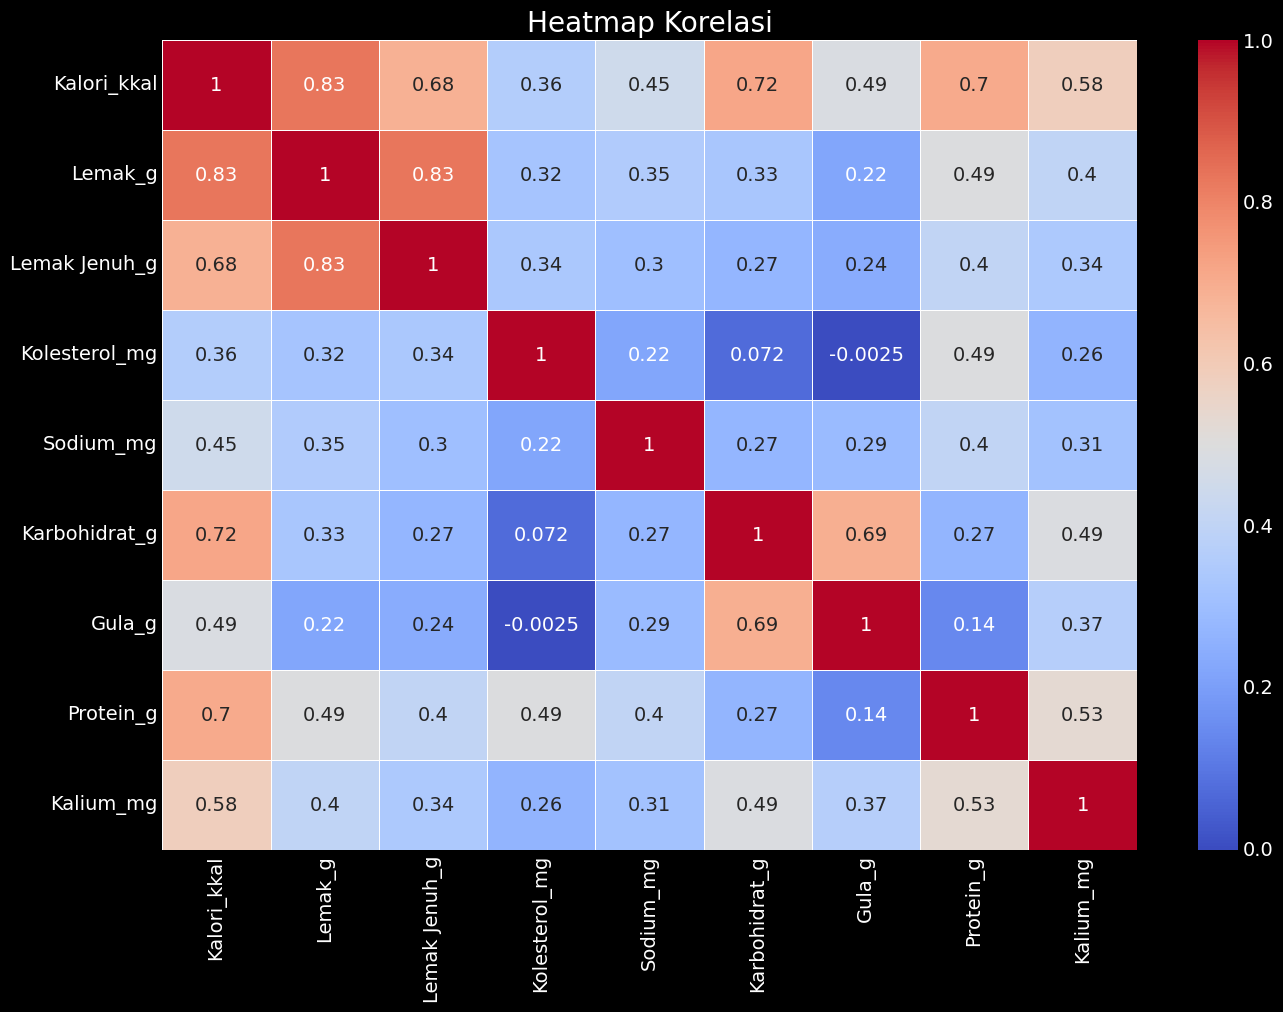

In [25]:
correlation_matrix = extracted_data[feature_selected].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## Standard Scale

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data[feature_selected].to_numpy())

In [27]:
prep_data

array([[-0.76960156, -0.86193886, -0.71105459, ..., -0.5340078 ,
        -0.73407978, -1.11277739],
       [-0.57929435, -0.71972688, -0.72547366, ..., -0.24988144,
        -0.70803838, -0.76680382],
       [ 0.12484232, -0.08830569, -0.50109899, ..., -0.05317858,
        -0.31578984, -0.75444763],
       ...,
       [ 0.28977523, -1.00187545, -0.90588777, ..., -0.10954373,
        -0.45738994,  0.67578239],
       [ 0.33418024,  0.45551292,  0.12525099, ..., -0.72725974,
         1.4973424 ,  0.07650674],
       [-1.13752882, -0.96205609, -0.87071933, ..., -0.36951359,
        -0.85045227,  0.18153443]])

# Training Model

In [28]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [30]:
params={'n_neighbors':5,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 5,
                                              'return_distance': False}))])

## Test Model

In [31]:
data_test = extracted_data[feature_selected].iloc[0:1].to_numpy()

In [32]:
transformed = pipeline.transform(data_test)[0]
print(f"Original: {data_test}")
print(f"Transformed: {transformed}")

Original: [[106.      1.73    0.634  43.     10.     19.3     3.46    3.7    26.   ]]
Transformed: [  0   6 284  14   1]


### Rcommendation Recipes by Macro

In [33]:
extracted_data.iloc[transformed]

,Name,Meal Type,Serving,Prep Time,Cook Time,Ingredients,Intructions,Energi_kj,Lemak_g,Protein_g,...,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg,total_prep_food
0,Donat,"['Roti & Produk Panggang', 'Makanan Ringan', '...",12 porsi,20 menit,15 menit,"['3 gram ragi', '40 gram kuning telur', '30 gr...","['Campur semua bahan kering.', 'Tambahkan semu...",444.0,1.73,3.70,...,0.634,0.0,0.205,0.528,43.0,0.1,3.46,10.0,26.0,35
6,Kue Gandum Pisang,"['Roti & Produk Panggang', 'Makan Pagi', 'Maka...",8 porsi,30 menit,30 menit,"['30 gram susu', '1 ekstra besar telur', '175 ...",['Kupas dan haluskan pisang. Campur dengan tel...,433.0,1.93,3.18,...,0.429,0.0,0.520,0.684,31.0,1.5,5.35,12.0,102.0,60
288,Roti Tawar,['Roti & Produk Panggang'],8 porsi,1 jam,30 menit,"['1 besar telur', '3 1/2 gram ragi', '1 sejump...",['Campurkan semua bahan kecuali margarin dan g...,561.0,3.34,4.17,...,0.795,0.0,0.796,0.778,26.0,1.4,2.56,61.0,90.0,90
14,Kue Oat Pisang,"['Roti & Produk Panggang', 'Makanan Penutup', ...",11 porsi,15 menit,30 menit,"['100 g telur', '1 porsi minyak nabati', '250 ...","['Haluskan pisang raja.', 'Tambahkan telur, mi...",638.0,4.96,4.04,...,0.813,0.0,0.748,1.743,39.0,2.7,4.90,31.0,75.0,45
1,Muffin Oat Pisang,"['Roti & Produk Panggang', 'Makanan Penutup', ...",5 porsi,10 menit,25 menit,"['1 sedang telur', '1 sdt ekstrak vanila', '15...","['Masukan semua bahan pada blender.', 'Setelah...",571.0,2.98,4.02,...,0.593,0.0,0.714,1.203,37.0,2.5,5.93,295.0,138.0,35


### Filtering Recipes by Ingredients

In [43]:
selected_ingredients = ["tempe", "udang", "telur"]
filtered_data = extracted_data[~extracted_data['Ingredients'].str.contains('|'.join(selected_ingredients), case=False, regex=True)]
filtered_data

,Name,Meal Type,Serving,Prep Time,Cook Time,Ingredients,Intructions,Energi_kj,Lemak_g,Protein_g,...,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg,total_prep_food
3,Bilah Energi Oatmeal Cokelat,"['Makanan Ringan', 'Makanan Penutup']",16 porsi,30 menit,0 menit,['25 gram biji bunga matahari (yang) dikuliti ...,['Sangrai oatmeal sampai kecoklatan. Dinginkan...,386.0,3.61,2.06,...,0.552,0.000,0.674,0.572,0.0,1.0,7.44,26.0,71.0,30
7,Gandum dengan Buah,"['Makan Pagi', 'Makanan Ringan']",2 porsi,10 menit,10 menit,"['1 sdm madu', '1 gelas yogurt stroberi', '3 s...","['Masak gandum dengan air sesuai kemasan.', 'P...",1050.0,3.80,4.57,...,1.525,0.085,0.000,0.750,5.0,4.4,21.30,16.0,96.0,20
8,Saus Cokelat,['Saus dan Bumbu'],4 porsi,5 menit,10 menit,"['10 gram mentega', '250 ml air', '25 gram tep...",['Panaskan air dalam panci tapi jangan sampai ...,327.0,3.65,2.12,...,2.439,0.000,0.102,0.531,6.0,1.0,0.02,2.0,7.0,15
13,Jus Hijau,['Minuman'],2 porsi,15 menit,0 menit,"['1/2 lemon', '75 gram pepaya', '77 gram nanas...","['Peras jus dari lemon.', 'Campur semua bahan ...",255.0,0.28,1.26,...,0.057,0.000,0.103,0.026,0.0,2.7,10.62,24.0,358.0,15
16,Ayam dengan Jagung dan Kacang,"['Makan Siang', 'Hidangan Utama']",1 porsi,10 menit,10 menit,"['8 gram cabai merah atau rawit', '69 gram dag...","['Hancurkan bawang putih dan merica.', 'Panask...",837.0,4.50,24.91,...,1.062,0.000,1.514,1.252,59.0,4.6,2.89,64.0,557.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Protein Bar Kacang Tanah,"['Makanan Ringan', 'Makanan Penutup']",15 porsi,15 menit,0 menit,"['100 gram roasted unsalted peanuts', '25 gram...","['Giling kacang goreng.', 'Campurkan semua bah...",302.0,3.63,2.20,...,0.504,0.000,1.135,1.774,0.0,0.8,5.37,1.0,61.0,15
319,Klepon Ubi,['Makanan Ringan'],4 porsi,30 menit,10 menit,"['250 gram ubi', '25 gram gula merah', '50 gra...","['Rebus/kukus Ubi Selama 10 menit, hancurkan d...",522.0,0.04,1.01,...,0.012,0.000,0.012,0.002,0.0,2.0,8.62,38.0,232.0,40
323,Tumis Oatmeal Dengan Sayur,['Makan Pagi'],1 porsi,10 menit,15 menit,"['1 sejumput lada', '1 sdt garam', '1 mangkok,...","['Sangrai oatmeal, kurang lebih 5 menit, sampa...",1142.0,0.50,7.10,...,0.080,0.000,0.242,0.026,0.0,19.9,7.15,2441.0,605.0,25
325,Tumis Kacang Panjang,"['Hidangan Utama', 'Makan Siang']",1 porsi,5 menit,10 menit,"['100 gram dada ayam', '55 g kacang panjang', ...","['Potong kacang panjang, dada ayam, bawang bom...",1172.0,13.31,31.12,...,3.012,0.000,3.874,5.232,83.0,2.4,1.78,468.0,411.0,15


## Filtering Recipes by Prep Food Limit

In [47]:
total_prep_food_limit = 30

# Gunakan loc untuk melakukan filter
filtered_data = extracted_data.loc[extracted_data['total_prep_food'] <= total_prep_food_limit]
filtered_data

,Name,Meal Type,Serving,Prep Time,Cook Time,Ingredients,Intructions,Energi_kj,Lemak_g,Protein_g,...,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg,total_prep_food
2,Banana Bread Oats,"['Makanan Ringan', 'Makanan Penutup', 'Roti & ...",4 porsi,15 menit,15 menit,"['2 besar telur', '1 sdt kayu manis', '115 g b...",['Panaskan oven/airfryer dengan suhu 160°C sel...,1032.0,8.53,8.84,...,1.231,0.000,1.202,2.240,106.0,4.4,7.64,76.0,142.0,30
3,Bilah Energi Oatmeal Cokelat,"['Makanan Ringan', 'Makanan Penutup']",16 porsi,30 menit,0 menit,['25 gram biji bunga matahari (yang) dikuliti ...,['Sangrai oatmeal sampai kecoklatan. Dinginkan...,386.0,3.61,2.06,...,0.552,0.000,0.674,0.572,0.0,1.0,7.44,26.0,71.0,30
5,Mie Shirataki Goreng,"['Hidangan Utama', 'Makanan Ringan', 'Makan Si...",2 porsi,15 menit,10 menit,"['1 sejumput salt', '1 buah utuh portabella mu...",['Panaskan wajan dengan minyak dan tumis irisa...,732.0,5.92,9.13,...,1.303,0.000,0.968,0.819,19.0,2.8,8.15,439.0,324.0,25
7,Gandum dengan Buah,"['Makan Pagi', 'Makanan Ringan']",2 porsi,10 menit,10 menit,"['1 sdm madu', '1 gelas yogurt stroberi', '3 s...","['Masak gandum dengan air sesuai kemasan.', 'P...",1050.0,3.80,4.57,...,1.525,0.085,0.000,0.750,5.0,4.4,21.30,16.0,96.0,20
8,Saus Cokelat,['Saus dan Bumbu'],4 porsi,5 menit,10 menit,"['10 gram mentega', '250 ml air', '25 gram tep...",['Panaskan air dalam panci tapi jangan sampai ...,327.0,3.65,2.12,...,2.439,0.000,0.102,0.531,6.0,1.0,0.02,2.0,7.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Pancake Oat,['Makan Pagi'],1 porsi,5 menit,5 menit,"['20 g susu rendah lemak', '100 g putih telur'...","['Panaskan pan dengan api sedang, jika dikira ...",849.0,1.07,14.69,...,0.246,0.000,0.015,0.114,2.0,11.0,1.76,178.0,199.0,10
322,Tumis Brokoli Udang,"['Hidangan Utama', 'Makan Siang']",1 porsi,5 menit,10 menit,"['100 gram udang', '2 mangkok, dicincang broko...",['Tumis bawang putih menggunakan minyak zaitun...,1377.0,16.54,32.91,...,2.384,0.000,2.406,10.214,206.0,4.8,3.12,674.0,763.0,15
323,Tumis Oatmeal Dengan Sayur,['Makan Pagi'],1 porsi,10 menit,15 menit,"['1 sejumput lada', '1 sdt garam', '1 mangkok,...","['Sangrai oatmeal, kurang lebih 5 menit, sampa...",1142.0,0.50,7.10,...,0.080,0.000,0.242,0.026,0.0,19.9,7.15,2441.0,605.0,25
325,Tumis Kacang Panjang,"['Hidangan Utama', 'Makan Siang']",1 porsi,5 menit,10 menit,"['100 gram dada ayam', '55 g kacang panjang', ...","['Potong kacang panjang, dada ayam, bawang bom...",1172.0,13.31,31.12,...,3.012,0.000,3.874,5.232,83.0,2.4,1.78,468.0,411.0,15


In [48]:
import re

feature_selected = ["Kalori_kkal", "Lemak_g", "Lemak Jenuh_g", "Kolesterol_mg", "Sodium_mg", "Karbohidrat_g", "Gula_g", "Protein_g", "Kalium_mg"]

def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe[feature_selected].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter, prep_time_limit, max_nutritional_values):
    extracted_data=dataframe.copy()
    
    for column,maximum in zip(feature_selected,max_nutritional_values):
        extracted_data_max=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data_max=extracted_data_max[extracted_data_max['Ingredients'].str.contains(ingredient,regex=False)]
    if prep_time_limit!=None:
        extracted_data_max = extracted_data_max.loc[extracted_data_max['total_prep_food'] <= prep_time_limit]

    return extracted_data_max

def extract_ingredient_filtered_data(dataframe,ingredients):
    extracted_data=dataframe.copy()
    regex_string=''.join(map(lambda x:f'(?=.*{x})',ingredients))
    extracted_data=extracted_data[extracted_data['Ingredients'].str.contains(regex_string,regex=True,flags=re.IGNORECASE)]
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    _input=np.array(_input).reshape(1,-1)
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None, prep_time_limit=None, params={'n_neighbors':10,'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter, prep_time_limit ,max_nutritional_values)
    if len(extracted_data) <= 11:
        return "Error"
    else:
        prep_data,scaler=scaling(extracted_data)
        neigh=nn_predictor(prep_data)
        pipeline=build_pipeline(neigh,scaler,params)
        return apply_pipeline(pipeline,_input,extracted_data)

def extract_quoted_strings(s):
    # Find all the strings inside double quotes
    strings = re.findall(r'"([^"]*)"', s)
    # Join the strings with 'and'
    return strings

def output_recommended_recipes(dataframe):
    if dataframe is not None:
        output=dataframe.copy()
        output=output.to_dict("records")
        for recipe in output:
            recipe['Ingredients']=extract_quoted_strings(recipe['Ingredients'])
            recipe['RecipeInstructions']=extract_quoted_strings(recipe['RecipeInstructions'])
    else:
        output=None
    return output

In [49]:
test_input = extracted_data[feature_selected].iloc[200:201].to_numpy()

In [50]:
recommand(diet_dataset,test_input, max_list, prep_time_limit=10).head(5)

,Name,Meal Type,Serving,Prep Time,Cook Time,Ingredients,Intructions,Energi_kj,Lemak_g,Protein_g,...,Lemak Jenuh_g,Lemak Trans_g,Lemak tak Jenuh Ganda_g,Lemak tak Jenuh Tunggal_g,Kolesterol_mg,Serat_g,Gula_g,Sodium_mg,Kalium_mg,total_prep_food
46,Jus,"['Makanan Penutup', 'Minuman', 'Makan Pagi']",2 porsi,8 menit,0 menit,"['1/4 iris lime', '6 sedang strawberries', '1 ...","['Cuci dan potong buah dan sayur.', 'Masukkan ...",146.0,0.28,0.93,...,0.038,0.0,0.154,0.043,0.0,2.2,4.28,36.0,262.0,8
189,Bayam Jamur,['Sup'],2 porsi,5 menit,5 menit,"['1 kecil telur', '15 gram bawang putih', '80 ...","['Iris halus bawang merah dan putih.', 'Tumis ...",347.0,2.04,5.93,...,0.606,0.0,0.340,0.712,80.0,2.7,2.72,60.0,286.0,10
213,NasGor Receh,['Hidangan Utama'],1 porsi,3 menit,5 menit,"['50 gram nasi putih', '1 sdm cabai merah atau...","['Tumis bawang putih sampai harum.', 'Masukkan...",586.0,4.08,5.16,...,0.214,0.0,0.489,0.190,0.0,3.7,0.61,355.0,136.0,8
194,Gulungan Salad Daging Sapi Asap,"['Makanan Pembuka', 'Salad dan Salad Dressing']",1 porsi,5 menit,5 menit,"['1 sedang rice paper', '20 gram wortel', '20 ...",['Celupkan rice paper ke air hangat hingga lem...,753.0,6.78,11.72,...,1.065,0.0,0.080,0.058,20.0,1.2,2.29,720.0,199.0,10
172,Tumis Pakcoy,"['Makan Pagi', 'Makan Siang']",2 porsi,5 menit,5 menit,"['1 sdt bawang putih bubuk', '1 sdm cabai mera...","['Masukkan semua bumbu dan air.', 'Setelah men...",126.0,0.62,1.22,...,0.144,0.0,0.261,0.082,0.0,1.6,2.86,1456.0,193.0,10


In [4]:
for idx in range(0, 5, 2):
    print(idx)

0
2
4


In [51]:
def meals_plan(number_of_meals):
    if number_of_meals==3:
        return {'breakfast':0.35,'launch':0.40,'dinner':0.25}
    elif number_of_meals==4:
        return {'breakfast':0.30,'morning snack':0.05,'launch':0.40,'dinner':0.25}
    else:
        return {'breakfast':0.30,'morning snack':0.05,'launch':0.40,'afternoon snack':0.05,'dinner':0.20}

In [52]:
from random import uniform as rnd

def recommend_meal(calories, macro, number_of_meals, prep_food_time):
    meals_calories_perc = meals_plan(number_of_meals)
    recommended_meal = []
    for meal in meals_calories_perc:
        meal_calories=meals_calories_perc[meal]*calories
        meal_protein=meals_calories_perc[meal]*macro["protein"]
        meal_carbs=meals_calories_perc[meal]*macro["carbs"]
        meal_fat=meals_calories_perc[meal]*macro["fat"]
        if meal=='breakfast':        
            recommended_nutrition = {'nutritions': [meal_calories, meal_fat, rnd(0,4), rnd(0,30), rnd(0,400), meal_carbs, rnd(0,10), meal_protein, rnd(100,500)], 'prep_limit': prep_food_time['breakfast']}
        elif meal=='launch':
            recommended_nutrition = {'nutritions': [meal_calories, meal_fat, rnd(0,4), rnd(0,30), rnd(0,400), meal_carbs, rnd(0,10), meal_protein, rnd(100,500)], 'prep_limit': prep_food_time['launch']}
        elif meal=='dinner':
            recommended_nutrition = {'nutritions': [meal_calories, meal_fat, rnd(0,4), rnd(0,30), rnd(0,400), meal_carbs, rnd(0,10), meal_protein, rnd(100,500)], 'prep_limit': prep_food_time['dinner']}
        else:
            recommended_nutrition = {'nutritions': [meal_calories, meal_fat, rnd(0,4), rnd(0,30), rnd(0,400), meal_carbs, rnd(0,10), meal_protein, rnd(100,500)], 'prep_limit': None}
        recommended_meal.append(recommended_nutrition)
    return recommended_meal


In [53]:
number_of_meals = 3
daily_calories = 1742.4
macro = {"protein": 176.37,"carbs": 129.62, "fat": 57.61}
prep_food_limi = {'breakfast':15,'launch':20,'dinner':40}

meal_plan = recommend_meal(daily_calories, macro, None, number_of_meals, prep_food_limi)

In [54]:
test_input_meal = np.array(meal_plan[0]['nutritions'])
test_input_time = meal_plan[0]['prep_limit']

In [55]:
print("==Breakfast==".upper())

print(f"Prep Time: {test_input_time} menit")
for column, meal in zip(feature_selected, test_input_meal):
    print(f"{column}: {meal}")

==BREAKFAST==
Prep Time: 15 menit
Kalori_kkal: 609.84
Lemak_g: 20.1635
Lemak Jenuh_g: 3.2044759883835336
Kolesterol_mg: 0.4660854813361881
Sodium_mg: 232.2891413949019
Karbohidrat_g: 45.367
Gula_g: 6.793845389982205
Protein_g: 61.729499999999994
Kalium_mg: 401.7464768936798


In [56]:
recommand(diet_dataset,test_input_meal, max_list, prep_time_limit=test_input_time).iloc[5]

Name                                                      Yogurt dan Chia Bowl
Meal Type                                                       ['Makan Pagi']
Serving                                                                1 porsi
Prep Time                                                             10 menit
Cook Time                                                              0 menit
Ingredients                  ['100 gram chia seed', '1 buah naga', '80 g bl...
Intructions                  ['Potong dadu buah naga.', 'Siram dengan yoghu...
Energi_kj                                                               2594.0
Lemak_g                                                                  32.13
Protein_g                                                                 20.4
Karbohidrat_g                                                            69.11
Kalori_kkal                                                              620.0
Lemak Jenuh_g                                       

In [57]:
from backend.fit_calculators import FitnessCalculator

user_data = {
    "gender": "male",
    "height_cm": 175,
    "weight_kg": 80,
    "age": 30,
    "activity_level": "moderately active",
    "goal": "lose weight",
    "start_date": "2023-11-11",
    "target_date": "2024-03-11",
    "target_weight": 75
}

calculator = FitnessCalculator(**user_data)

# Contoh penggunaan fungsi-fungsi di dalam class 
number_of_meals = 3
daily_calories = calculator.calculate_daily_calories()
macro = calculator.calculate_macro()
prep_food_limi = {'breakfast':15,'launch':20,'dinner':40}

meal_plan = recommend_meal(daily_calories, macro, None, number_of_meals, prep_food_limi)

In [58]:
meal_plans = np.array(meal_plan[0]['nutritions'])
prep_times = meal_plan[0]['prep_limit']

print("==Breakfast==".upper())
print(f"Prep Time: {prep_times} menit")
for column, meal in zip(feature_selected, meal_plans):
    print(f"{column}: {meal}")

==BREAKFAST==
Prep Time: 15 menit
Kalori_kkal: 758.9574999999999
Lemak_g: 28.446669999999994
Lemak Jenuh_g: 0.5230675522766028
Kolesterol_mg: 14.081628522401257
Sodium_mg: 396.75032434676405
Karbohidrat_g: 64.00500749999999
Gula_g: 6.15645056306171
Protein_g: 61.72935999999999
Kalium_mg: 297.23753631894846


In [59]:
recommand(diet_dataset,meal_plans, max_list, prep_time_limit=prep_times).iloc[5]

Name                                                       Tumis Brokoli Udang
Meal Type                                    ['Hidangan Utama', 'Makan Siang']
Serving                                                                1 porsi
Prep Time                                                              5 menit
Cook Time                                                             10 menit
Ingredients                  ['100 gram udang', '2 mangkok, dicincang broko...
Intructions                  ['Tumis bawang putih menggunakan minyak zaitun...
Energi_kj                                                               1377.0
Lemak_g                                                                  16.54
Protein_g                                                                32.91
Karbohidrat_g                                                            14.31
Kalori_kkal                                                              329.0
Lemak Jenuh_g                                       